In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import functools
import pvtrace
import scintillator_tracer as st


ANGLE = 90

# Verification

In [3]:
crystal_kwargs = dict(material=st.definitions.LYSO(absorption_coefficient=1/50))
world_func = functools.partial(st.worlds.build_angled_isosceles_triangle_world, ANGLE, crystal_kwargs=crystal_kwargs)
nodes = world_func()
world = nodes['world']

height = st.geometry_helpers.get_node_height(nodes['crystal'])
light = st.definitions.generate_scintillated_light_node(world)
light.location = (0, 0, height/2)

scene = pvtrace.Scene(world)
all_ray_steps = st.processing.process_photons_with_visual(scene, 100, seed=100, open_browser=True)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7054/static/


# Grid trials

In [4]:
nodes = world_func()
crystal = nodes['crystal']

zrange = (
    st.geometry_helpers.min_physical_value(crystal, 'z')+0.4,
    st.geometry_helpers.max_physical_value(crystal, 'z')-0.3,
)
yrange = (
    st.geometry_helpers.min_physical_value(crystal, 'y')+0.5,
    st.geometry_helpers.max_physical_value(crystal, 'y')-0.5,
)

# print(st.geometry_helpers.convert_vertices_to_physical(crystal))
# print(st.geometry_helpers.convert_vertices_to_physical(nodes['esr_shell']))


# for c in ['x', 'y', 'z']:
#     print(c)

#     crystal_maxz = st.geometry_helpers.max_physical_value(crystal, c)
#     shell_maxz = st.geometry_helpers.max_physical_value(nodes['esr_shell'], c)
#     print('\tmax diff:', crystal_maxz - shell_maxz)

#     crystal_minz = st.geometry_helpers.min_physical_value(crystal, c)
#     shell_minz = st.geometry_helpers.min_physical_value(nodes['esr_shell'], c)
#     print('\tmin diff:', crystal_minz - shell_minz)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7055/static/


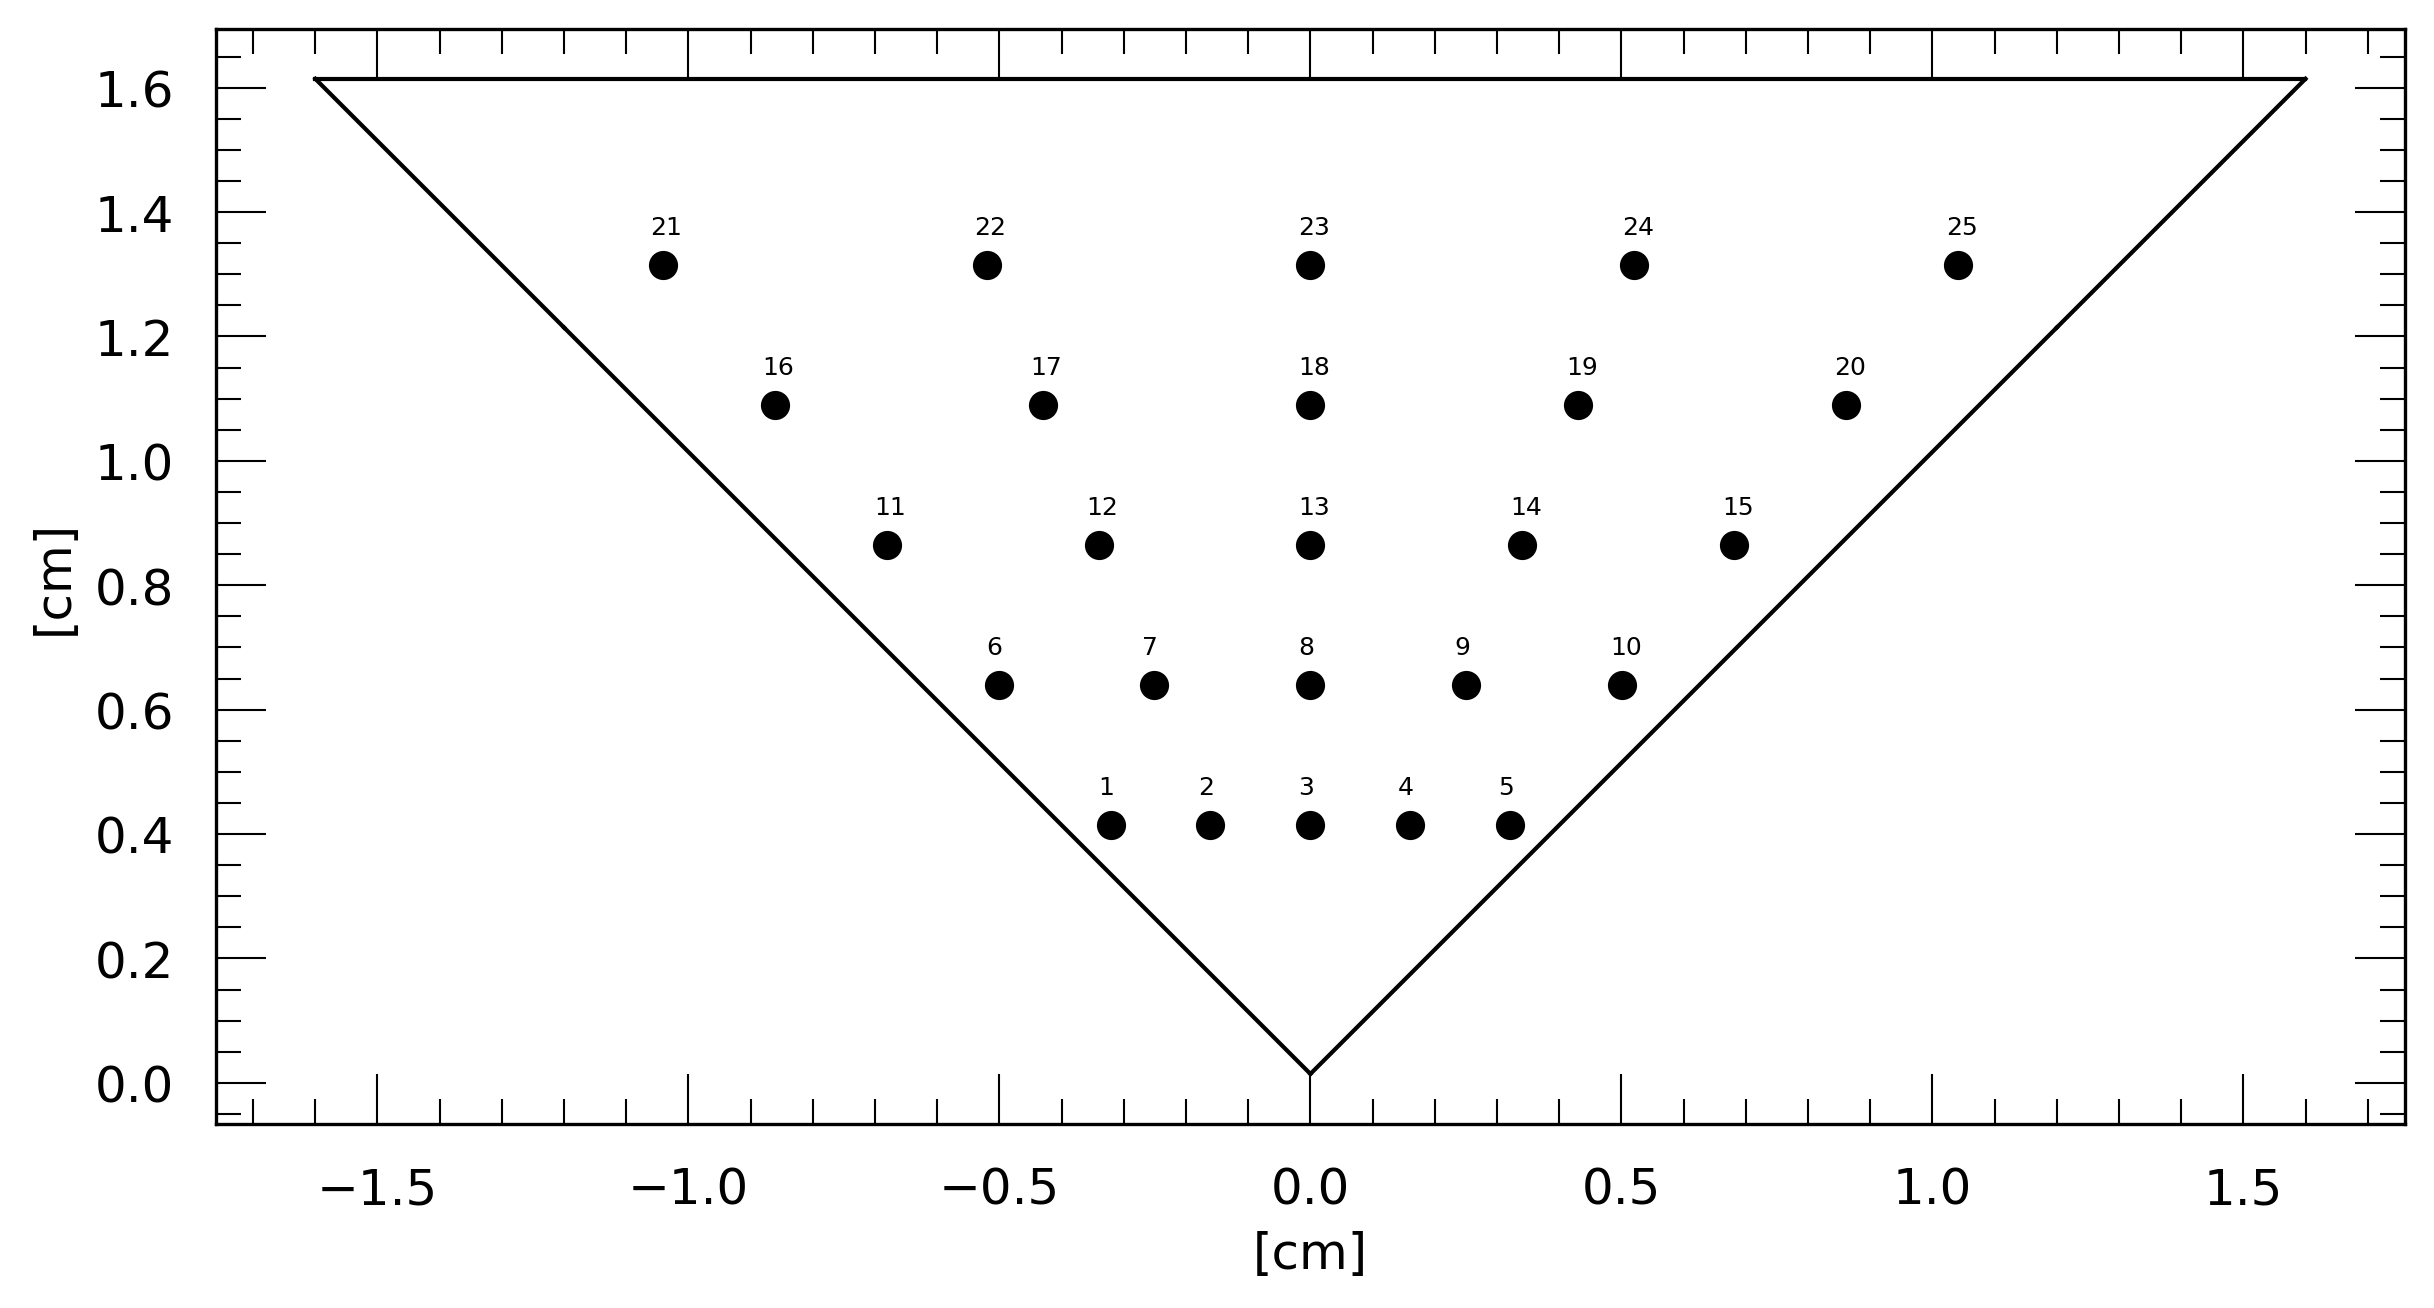

In [5]:
steps = 5
man = st.processing.Manager(world_func, out_dir=f'isosceles_triangle_{ANGLE}deg_angled/')
man.define_grid(
    vertical_range=zrange,
    horizontal_func=lambda z: (-0.8*z+0.01, -(-0.8*z+0.01)),
    steps=steps,
    visualize=True
)

## Run

In [6]:
runs = man.run(200, seed=100, visualize=False)

/home/reed/Documents/research/grimpress/crystal-geometry/scintillator_tracer/plotting.py:91: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  C = ax.pcolormesh(Y, Z, surface, **pcolorkwargs)


isosceles_triangle_90deg_angled/runs_20240720T131832/figures/crystal_absorbed.png
isosceles_triangle_90deg_angled/runs_20240720T131832/figures/optical pad_absorbed.png
isosceles_triangle_90deg_angled/runs_20240720T131832/figures/sipm_absorbed.png


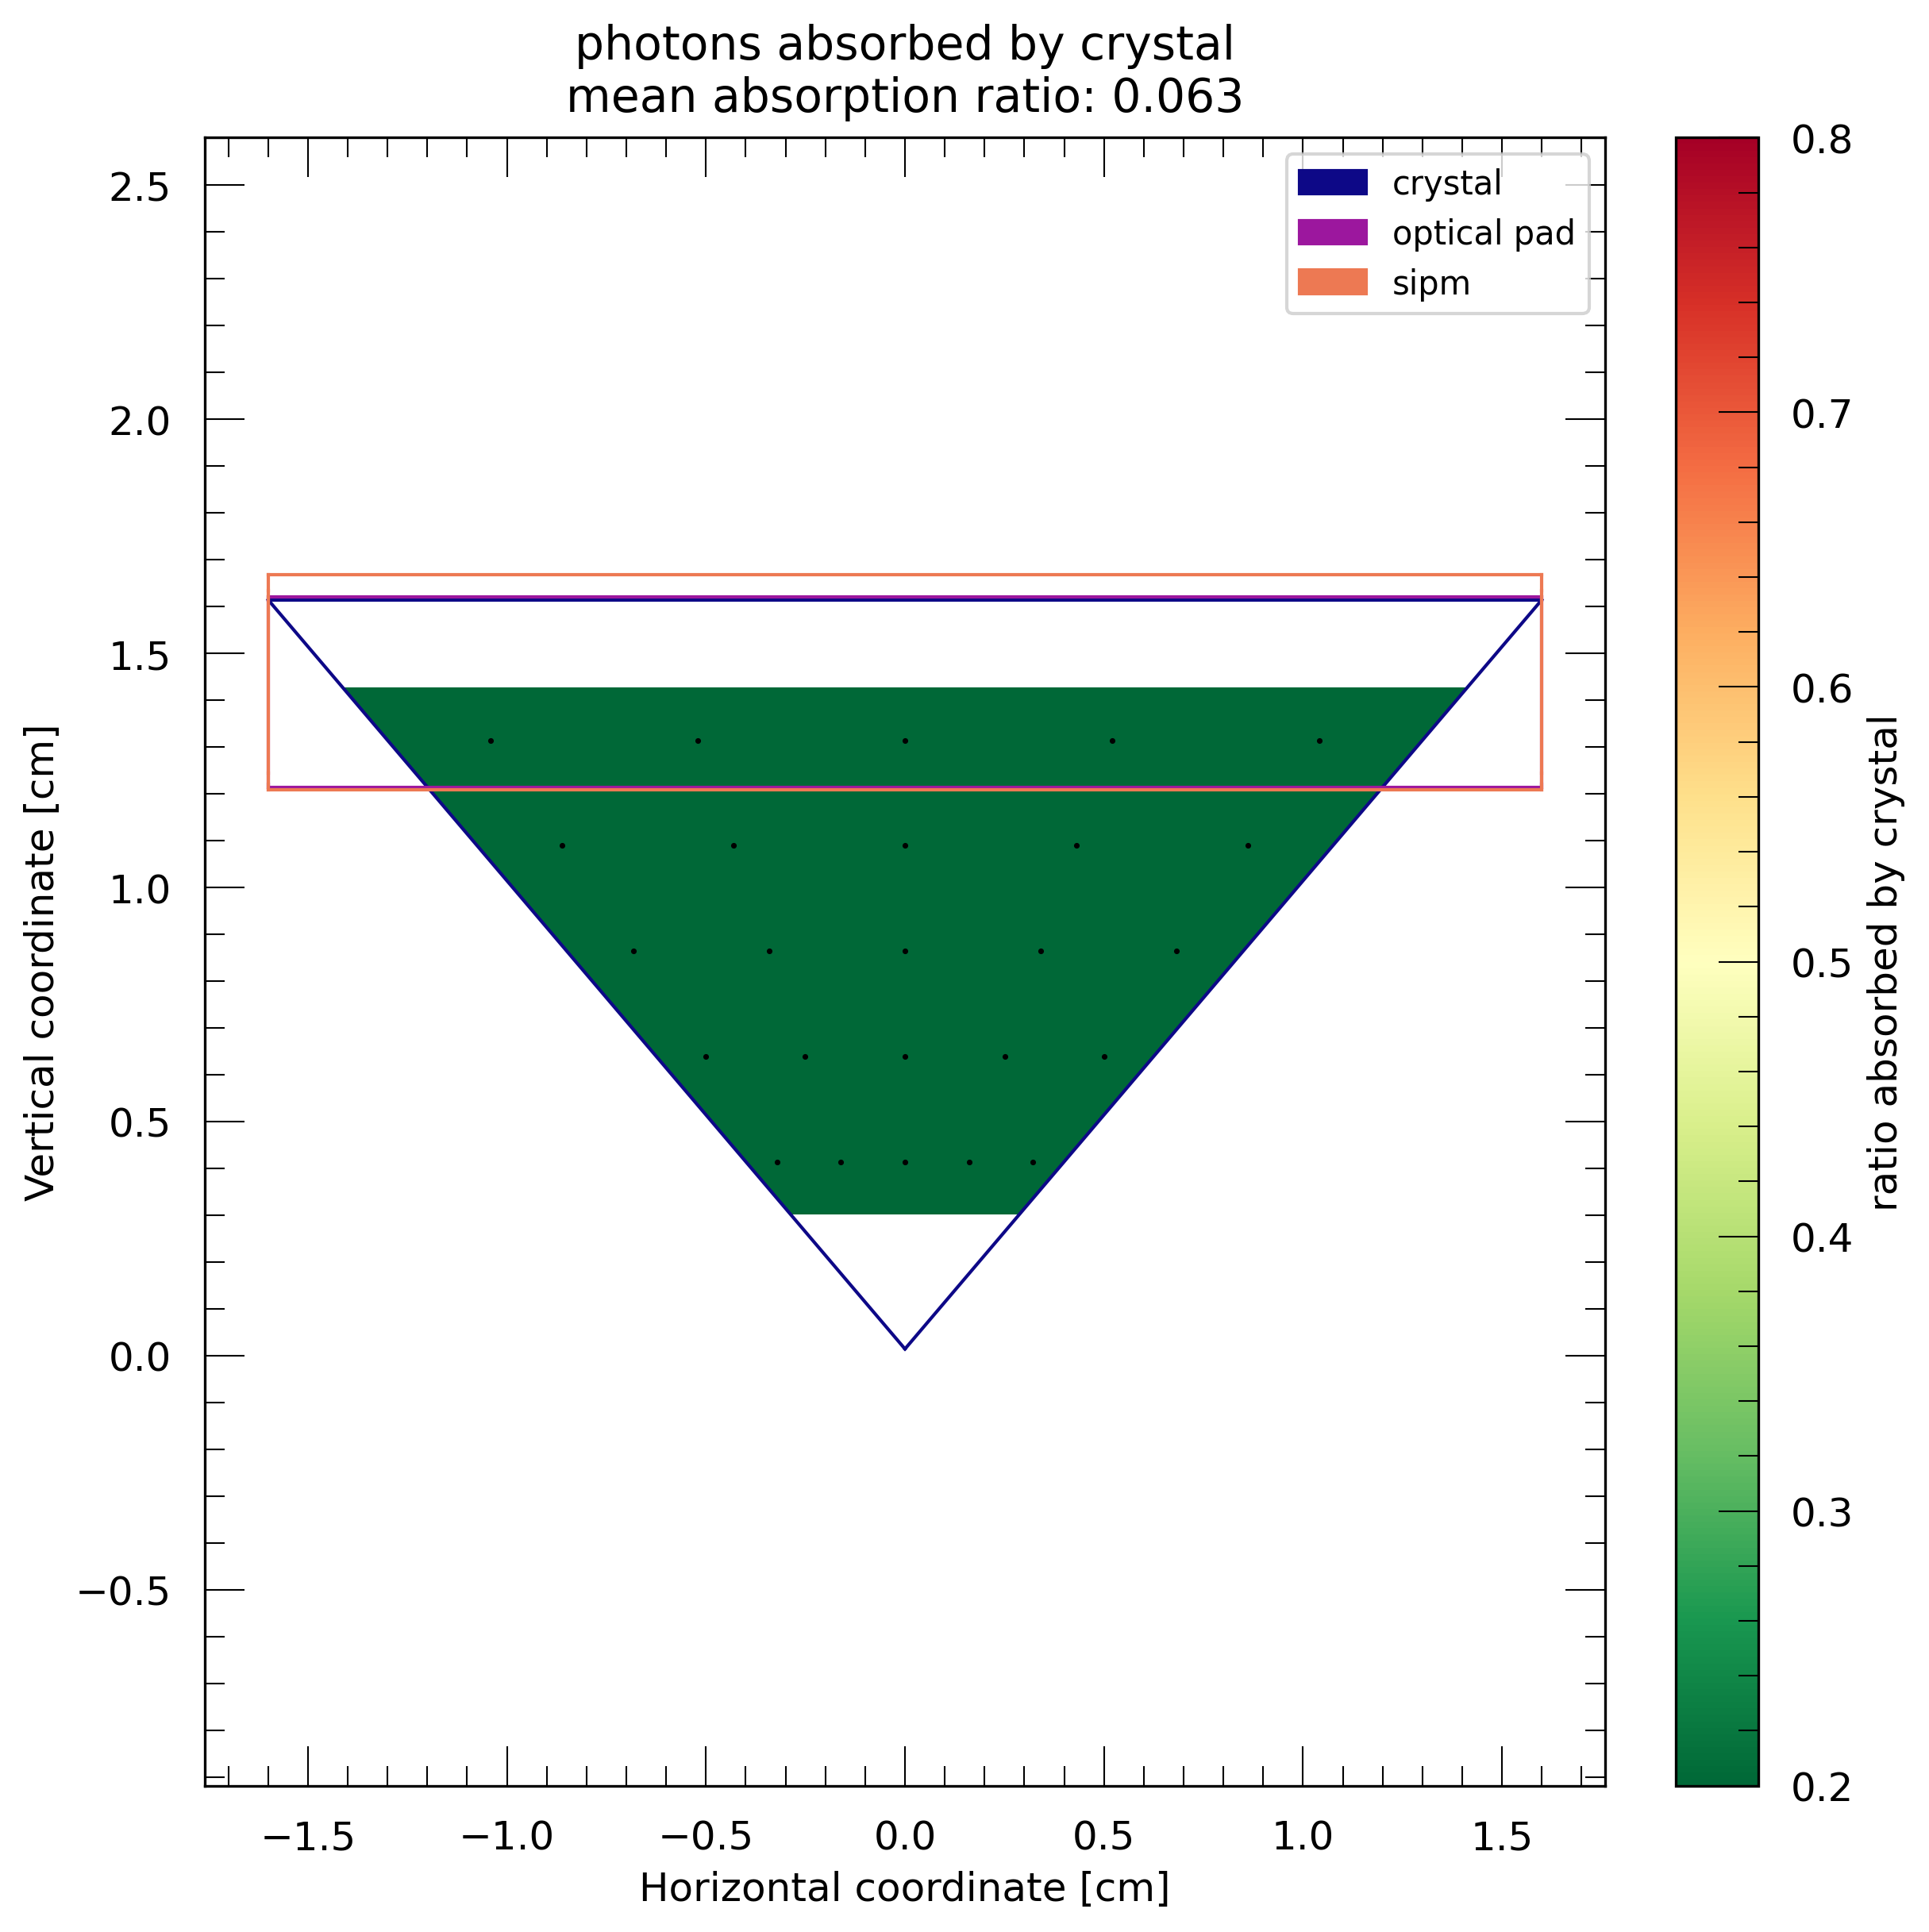

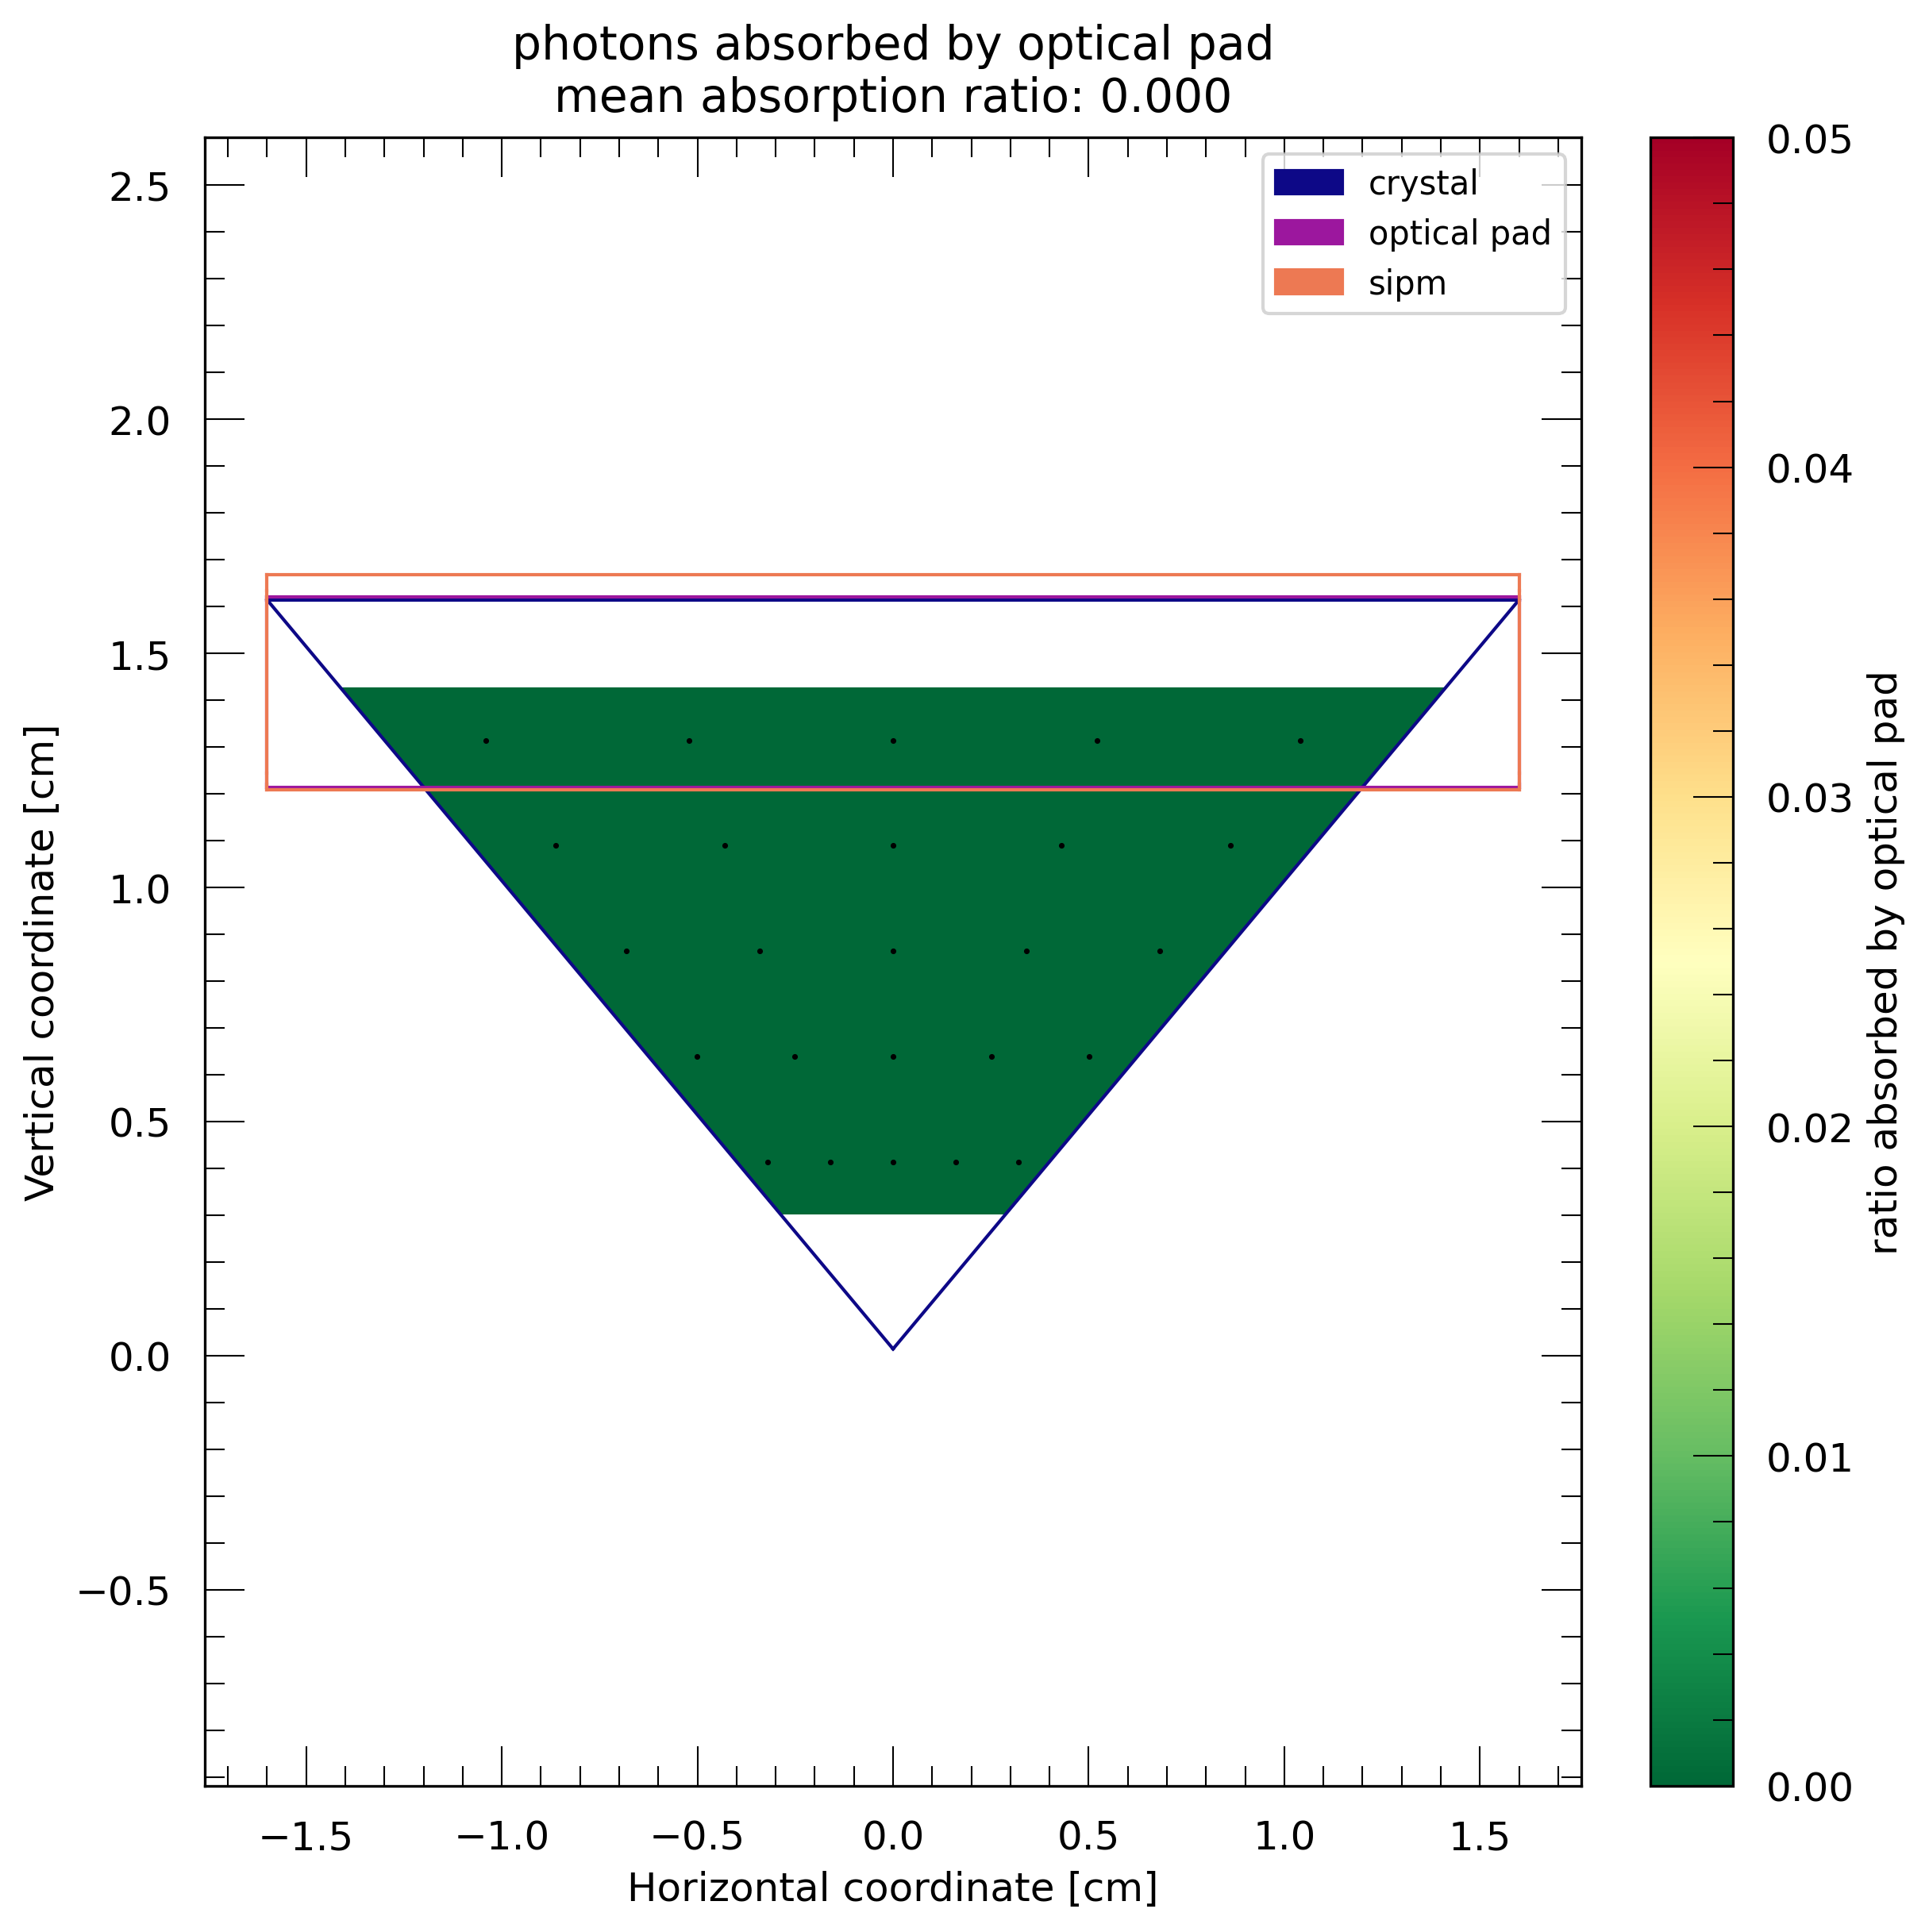

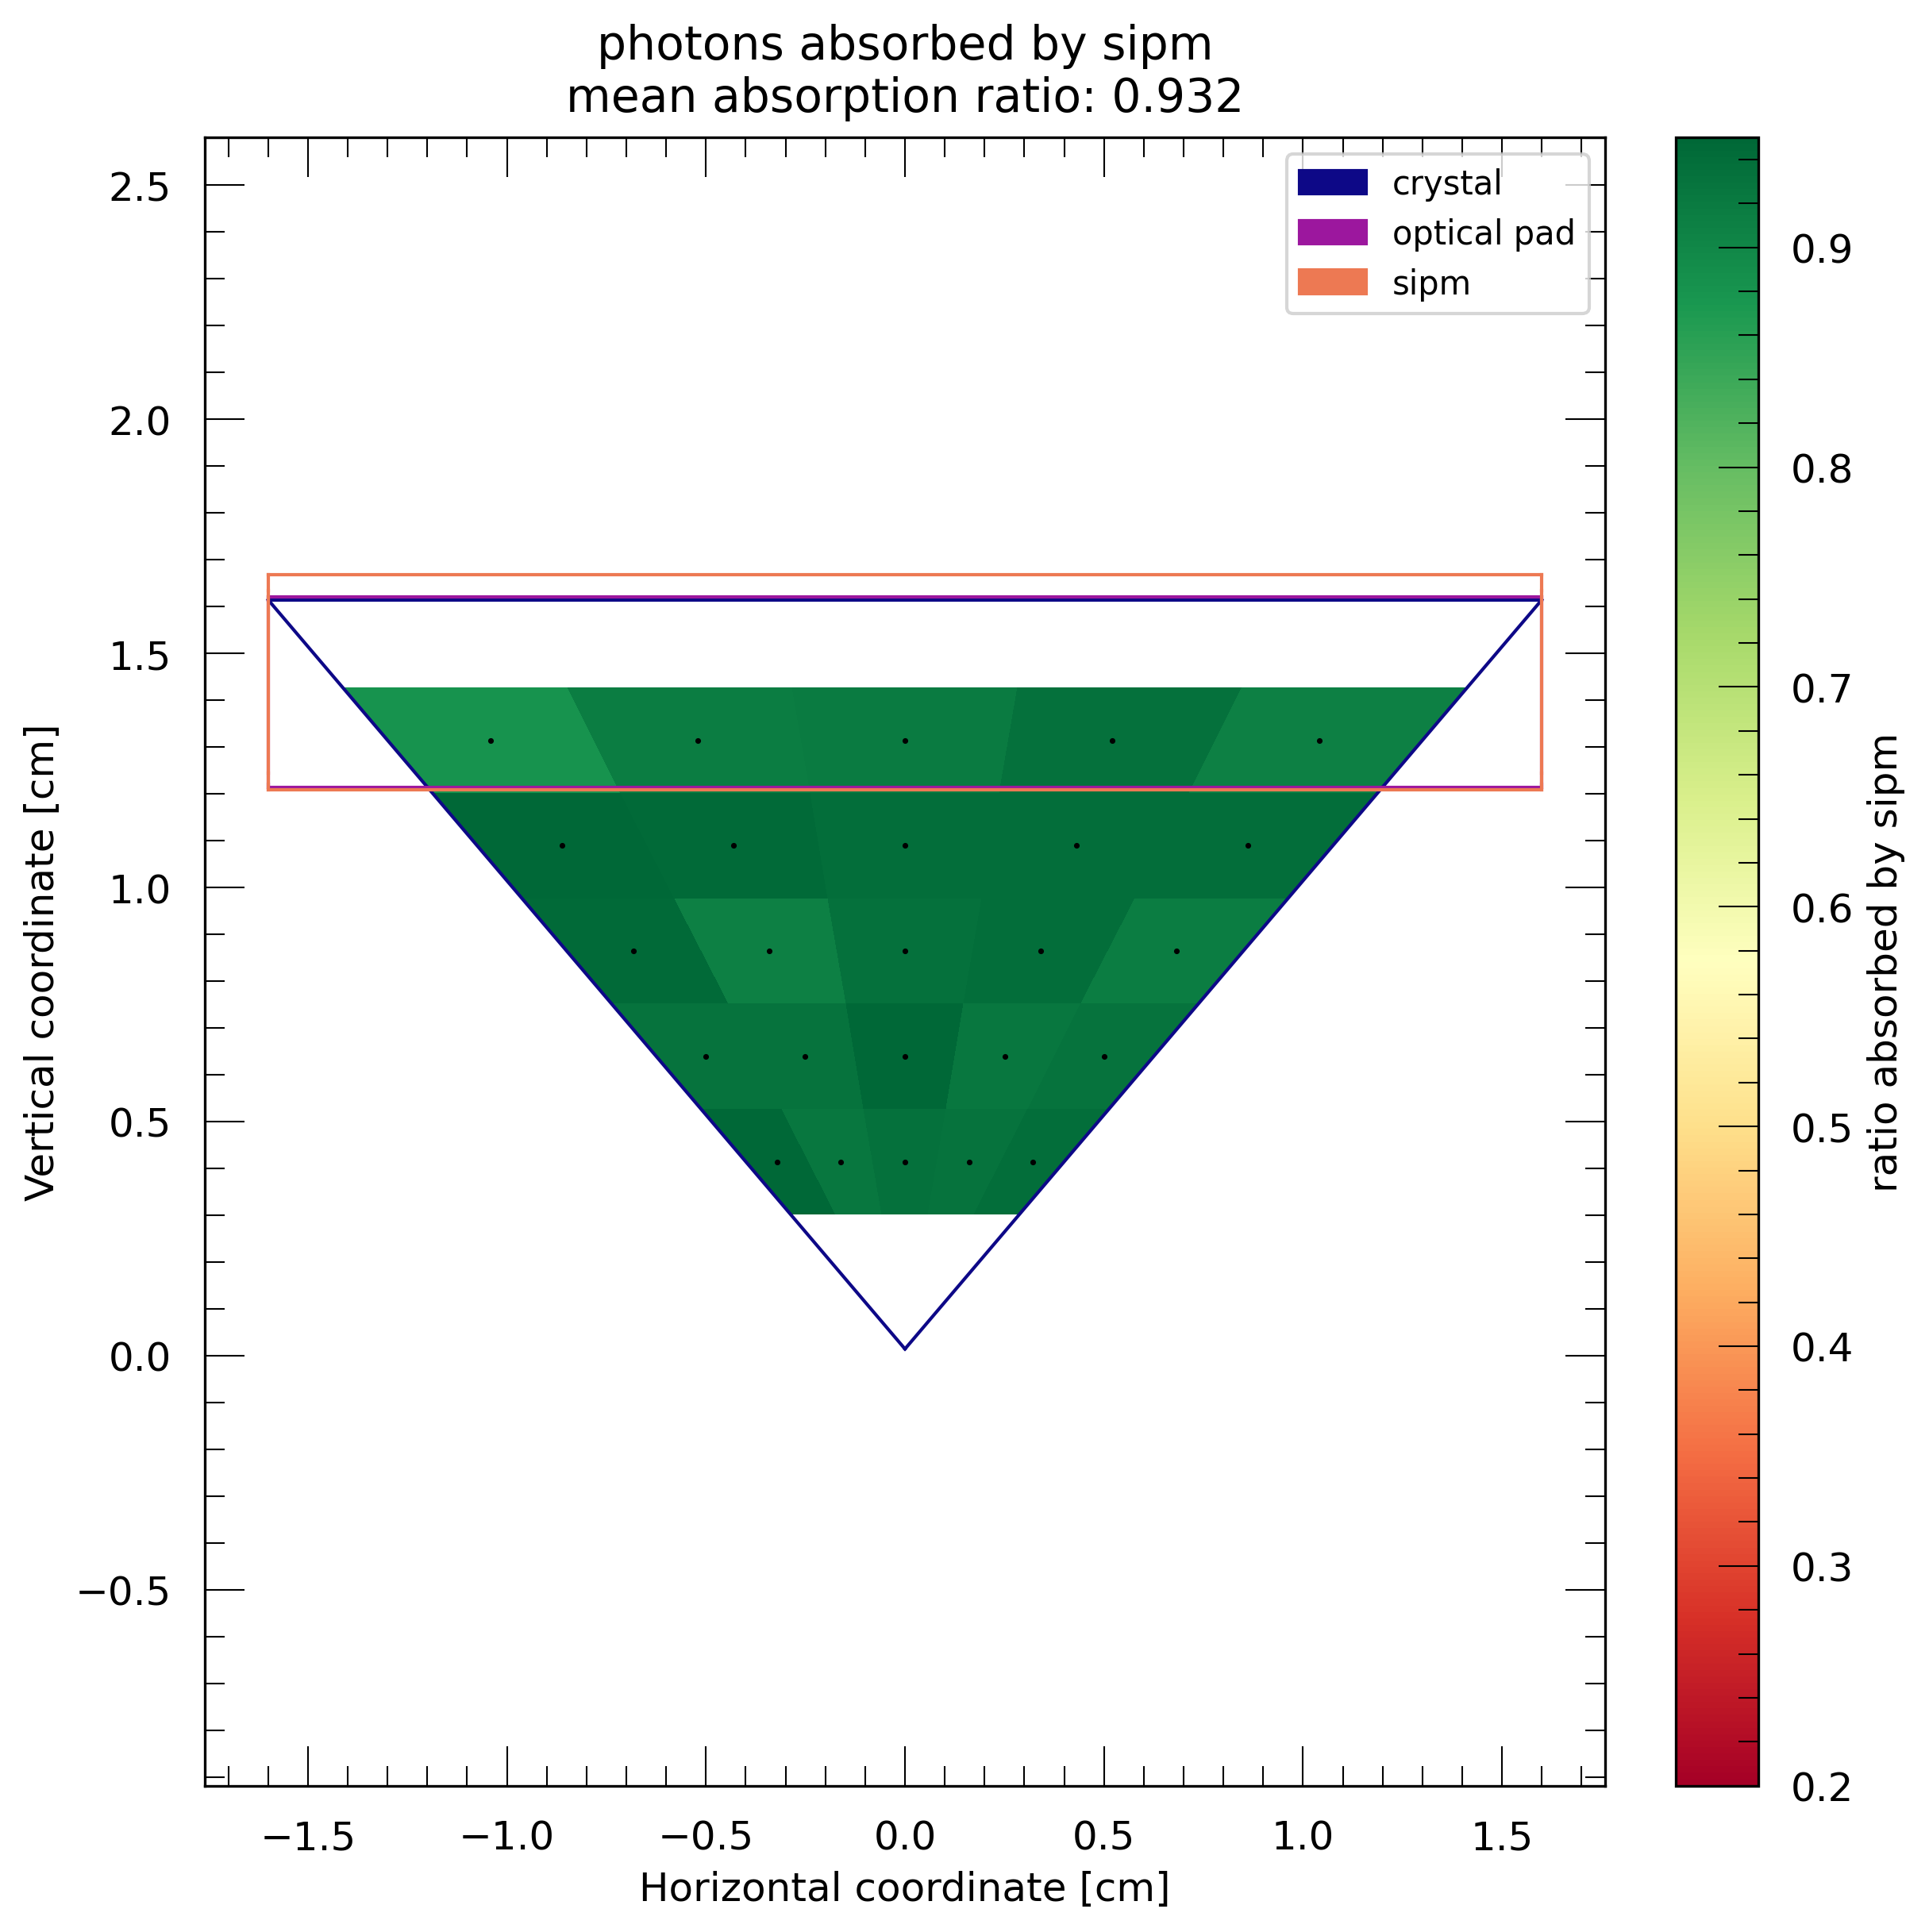

In [7]:
man.plot_all_ratios_absorbed(sipm_kwargs=dict(vmax=0.95))

## Mean free path

<AxesSubplot:title={'center':'mean path length: 2.70 cm'}, xlabel='Photon path length [cm]', ylabel='Counts'>

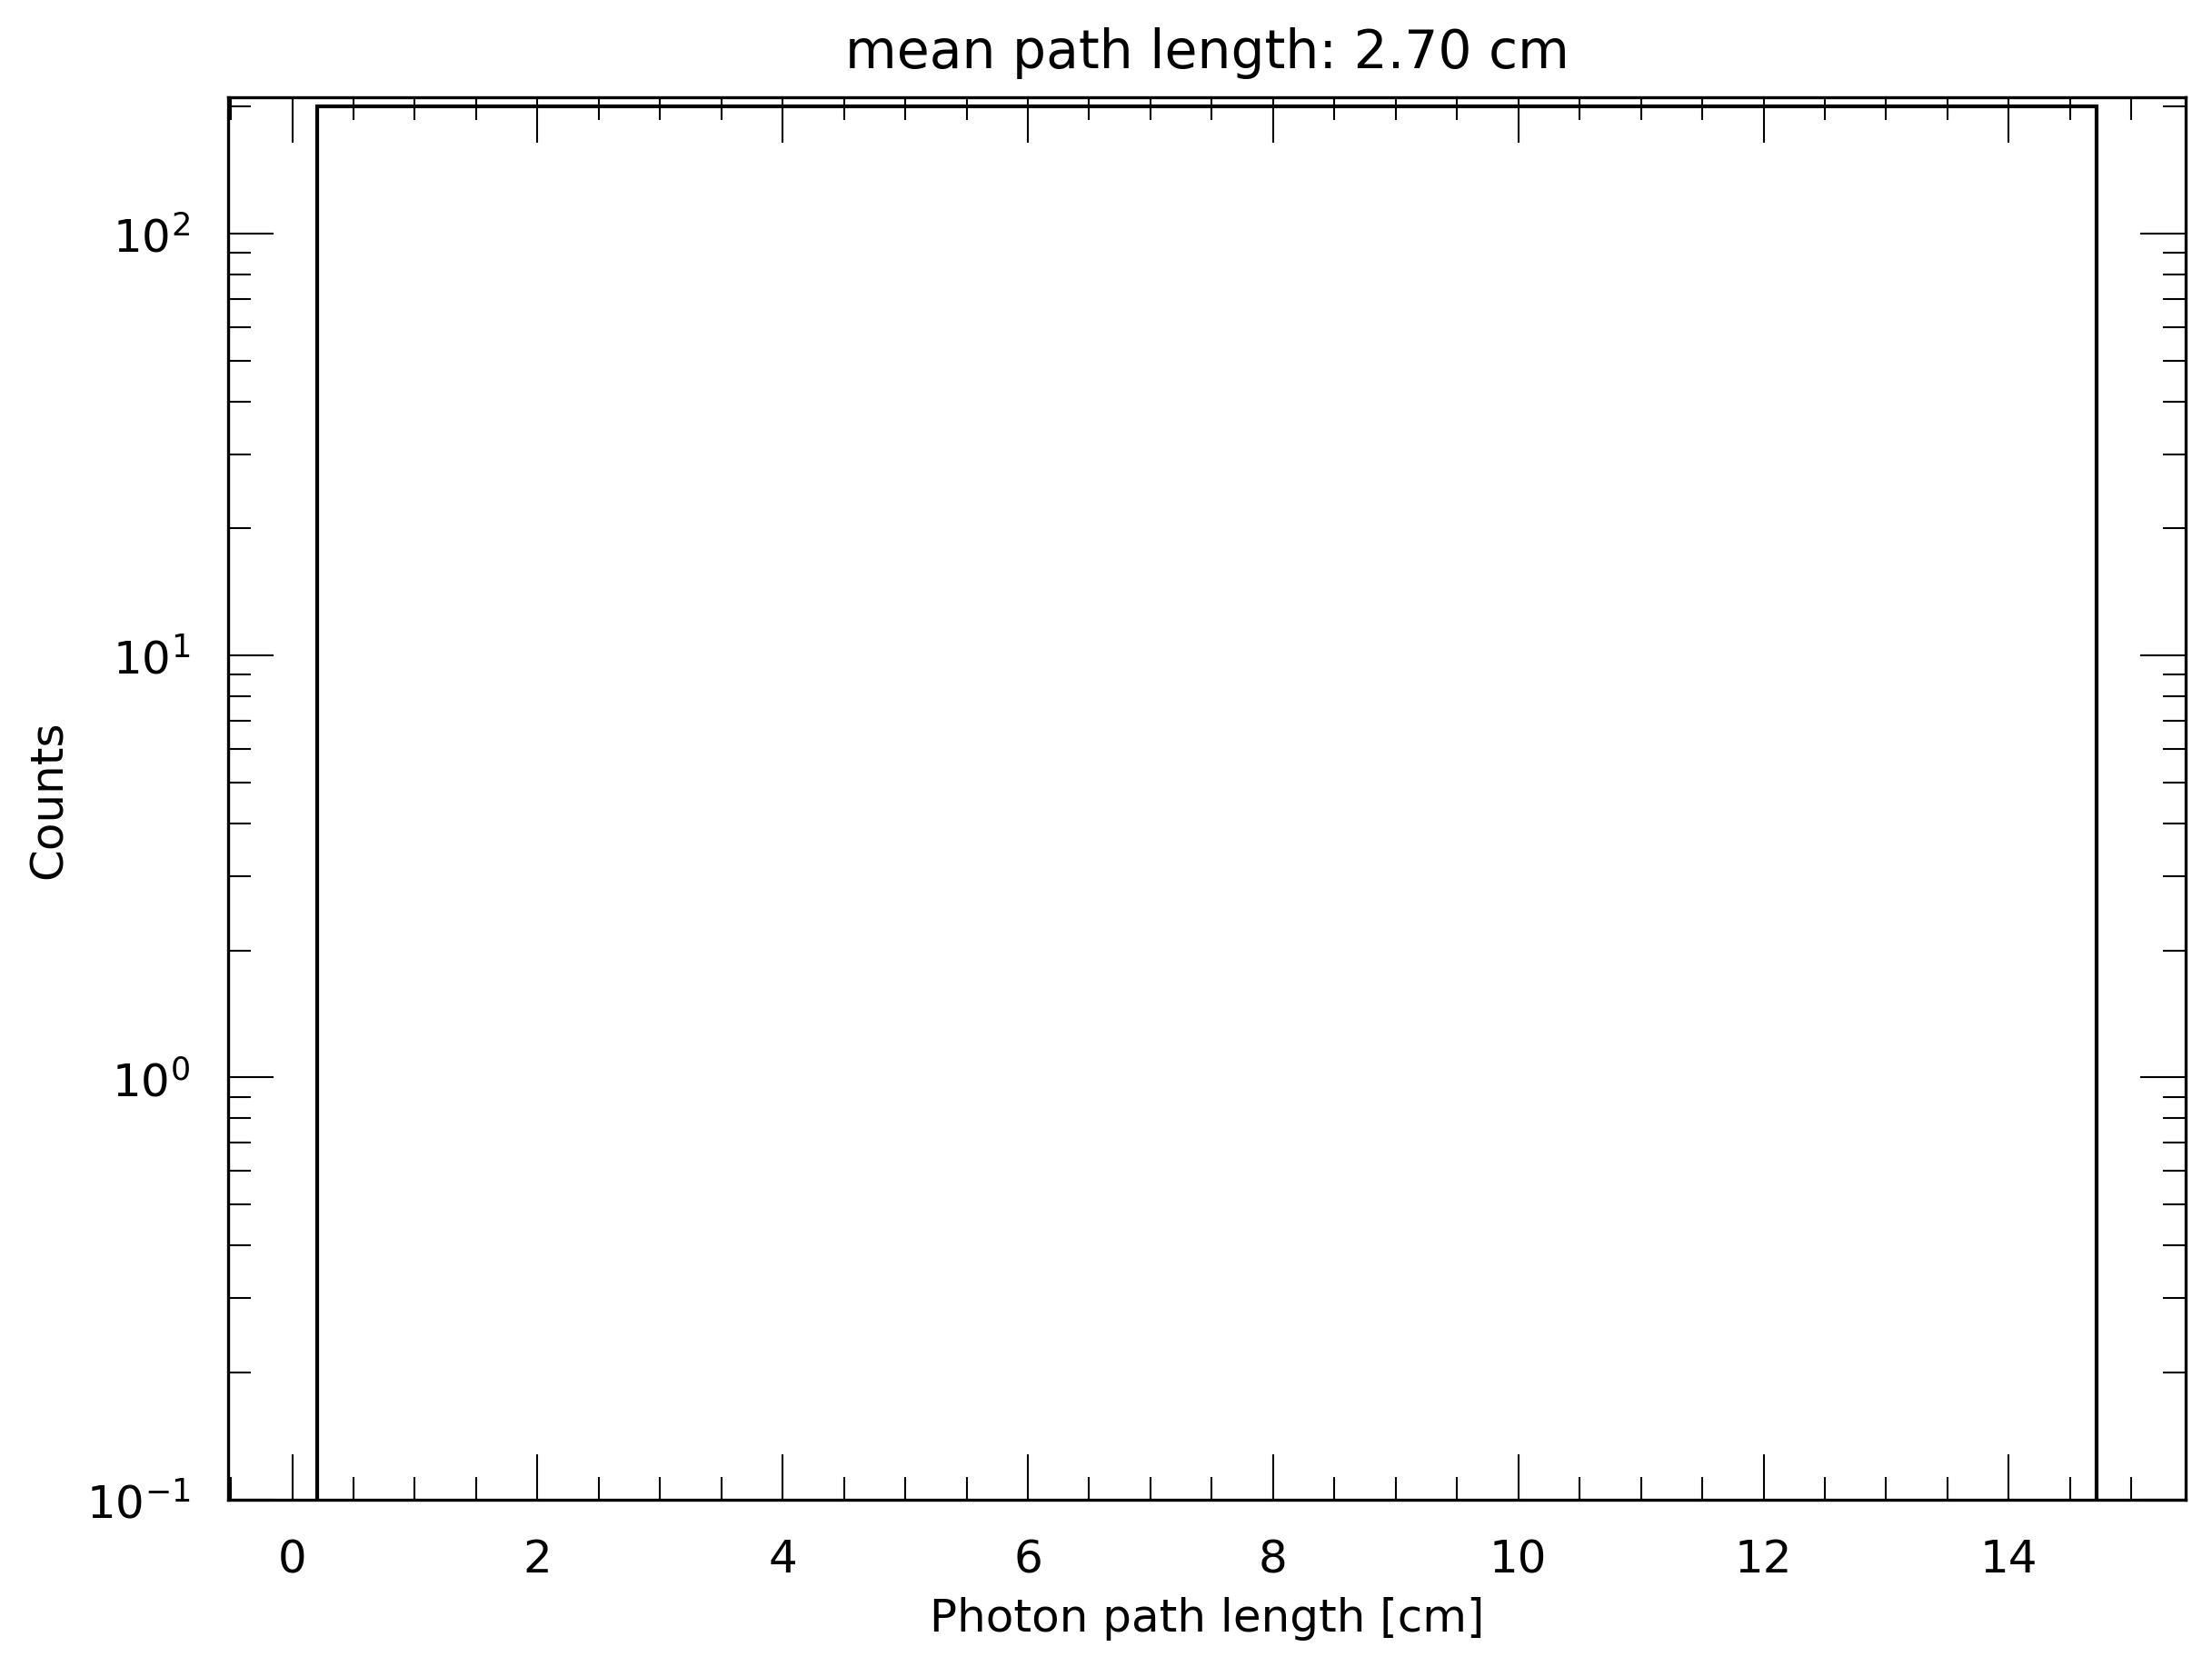

In [8]:
distances = st.processing.compute_ray_path_lengths(man.runs[0].ray_dict.all)
st.processing.histogram_distances(distances, bins=1)

run: 01
total number of optical photons: 200
	ratio absorb: 0.99
	ratio exit: 0.01
	ratio kill: 0.0
	ratio reflect: 0.0
	ratio crystal_absorbed: 0.025
	ratio optical_pad_absorbed: 0.0
	ratio sipm_absorbed: 0.965




run: 02
total number of optical photons: 200
	ratio absorb: 0.995
	ratio exit: 0.005
	ratio kill: 0.0
	ratio reflect: 0.0
	ratio crystal_absorbed: 0.065
	ratio optical_pad_absorbed: 0.0
	ratio sipm_absorbed: 0.925




run: 03
total number of optical photons: 200
	ratio absorb: 1.0
	ratio exit: 0.0
	ratio kill: 0.0
	ratio reflect: 0.0
	ratio crystal_absorbed: 0.065
	ratio optical_pad_absorbed: 0.0
	ratio sipm_absorbed: 0.935




run: 04
total number of optical photons: 200
	ratio absorb: 0.995
	ratio exit: 0.005
	ratio kill: 0.0
	ratio reflect: 0.0
	ratio crystal_absorbed: 0.065
	ratio optical_pad_absorbed: 0.0
	ratio sipm_absorbed: 0.93




run: 05
total number of optical photons: 200
	ratio absorb: 1.0
	ratio exit: 0.0
	ratio kill: 0.0
	ratio reflect: 0.0
	ratio crystal_ab

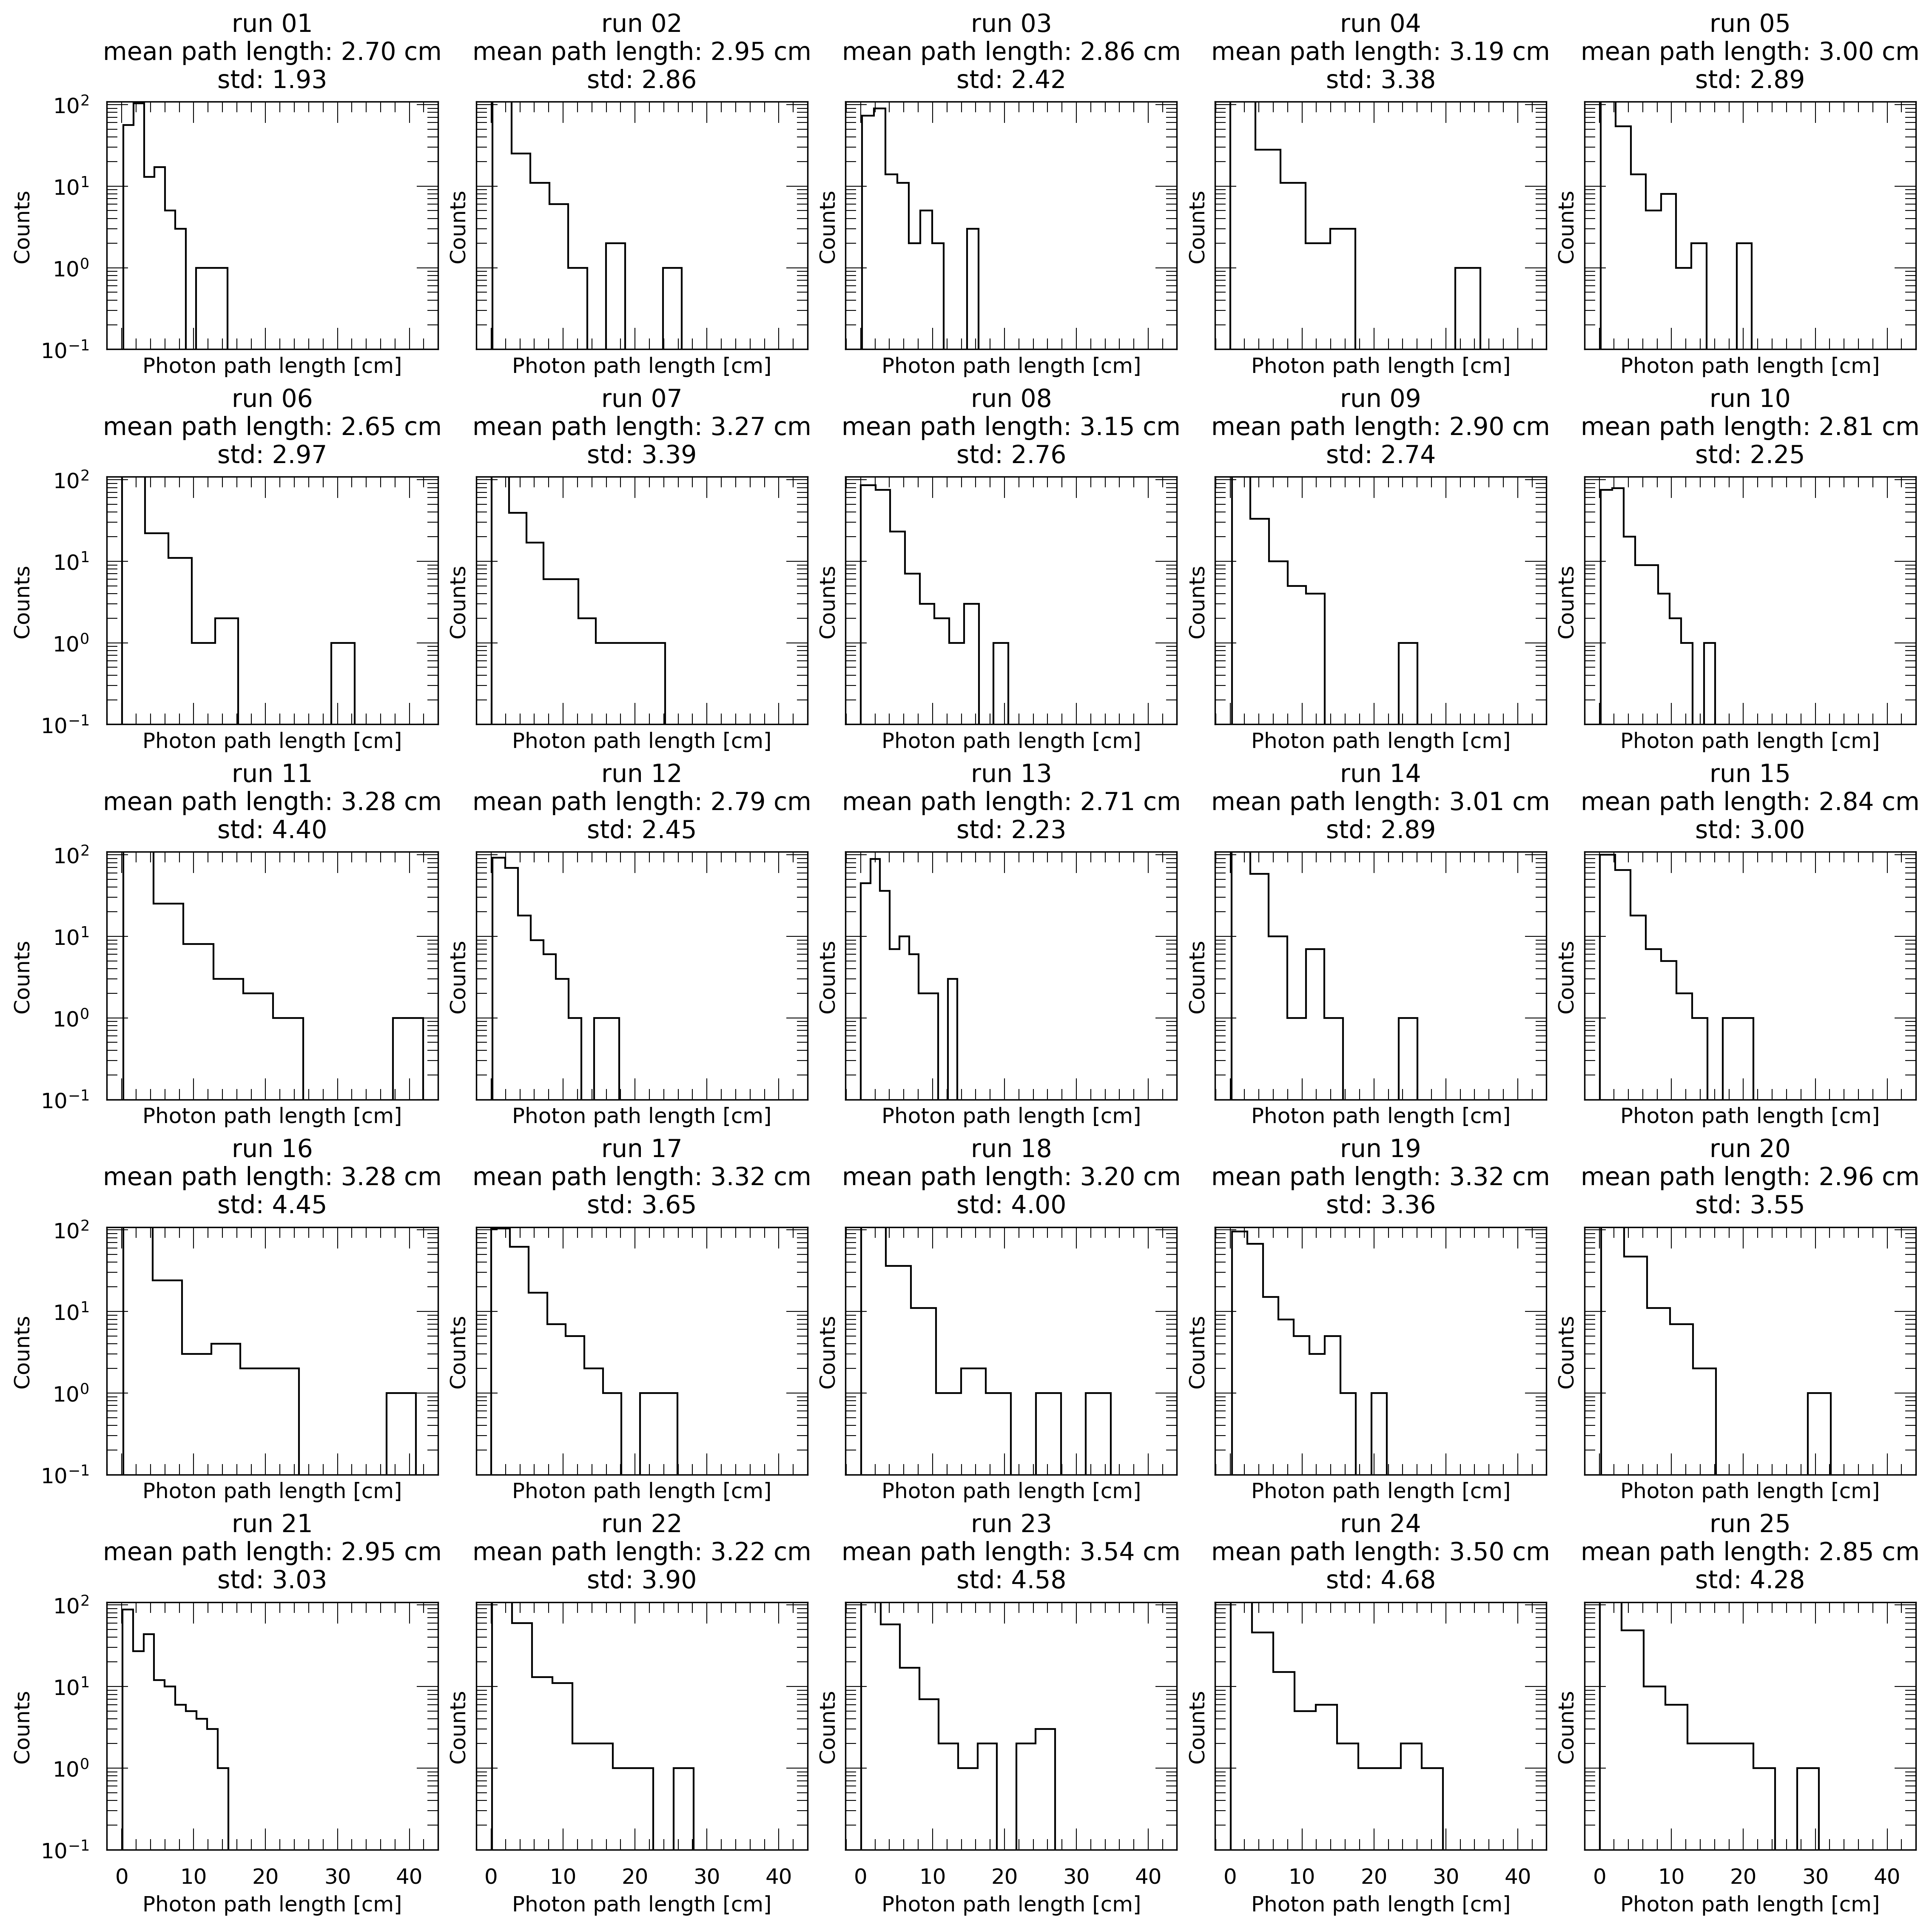

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(steps, steps, figsize=(3*steps, 3*steps), layout='constrained', sharex=True, sharey=True)
for i, run in enumerate(runs):
    row = i // steps
    col = i % steps
    ax = axs[row,col]

    events = run.ray_dict
    print('run:', run.index)
    st.processing.print_event_report(events)
    print('\n\n\n')
    distances = st.processing.compute_ray_path_lengths(events.all)
    st.processing.histogram_distances(distances, ax=ax)
    ax.set_title(f'run {run.index}\n{ax.get_title()}\nstd: {np.std(distances):0.2f}')

plt.show()